In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('geo.csv')

In [3]:
df

,Код поста,Дата,Значение
0,11272,2000-01-01,нб
1,11272,2000-01-02,нб
2,11272,2000-01-03,нб
3,11272,2000-01-04,нб
4,11272,2000-01-05,нб
...,...,...,...
995,11272,2002-09-22,0.002
996,11272,2002-09-23,0.002
997,11272,2002-09-24,0.002
998,11272,2002-09-25,0.002


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Код поста  1000 non-null   int64 
 1   Дата       1000 non-null   object
 2   Значение   1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [6]:
# Извлекаем день, месяц и год
# Год
df['Год'] = df['Дата'].dt.year
# Месяц
df['Месяц'] = df['Дата'].dt.month
# День
df['День'] = df['Дата'].dt.day

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Код поста  1000 non-null   int64         
 1   Дата       1000 non-null   datetime64[ns]
 2   Значение   1000 non-null   object        
 3   Год        1000 non-null   int64         
 4   Месяц      1000 non-null   int64         
 5   День       1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB


In [8]:
df['Код поста'].unique()

array([11272])

In [9]:
df[df['Значение'] == 'нб']

,Код поста,Дата,Значение,Год,Месяц,День
0,11272,2000-01-01,нб,2000,1,1
1,11272,2000-01-02,нб,2000,1,2
2,11272,2000-01-03,нб,2000,1,3
3,11272,2000-01-04,нб,2000,1,4
4,11272,2000-01-05,нб,2000,1,5
...,...,...,...,...,...,...
789,11272,2002-02-28,нб,2002,2,28
790,11272,2002-03-01,нб,2002,3,1
791,11272,2002-03-02,нб,2002,3,2
792,11272,2002-03-03,нб,2002,3,3


In [10]:
df['Значение'] = df['Значение'].replace('нб', np.nan) # Заменяем нб на nan

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Код поста  1000 non-null   int64         
 1   Дата       1000 non-null   datetime64[ns]
 2   Значение   612 non-null    object        
 3   Год        1000 non-null   int64         
 4   Месяц      1000 non-null   int64         
 5   День       1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB


In [12]:
df['Значение'] = df['Значение'].fillna(0) # Заполняем nan на 0

In [13]:
df['Значение'] = df['Значение'].astype(float) # Переводим тип из object(str) в float

In [14]:
df['Значение']

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
995    0.002
996    0.002
997    0.002
998    0.002
999    0.002
Name: Значение, Length: 1000, dtype: float64

In [15]:
df['Значение'].mean() # среднее значение 

1.150606999999998

In [16]:
df['Значение'].replace(0,round(df['Значение'].mean(), ndigits=3), inplace=True) 
# заменям(заполняем) все нули на среднее значение колонки

<Axes: xlabel='Дата'>

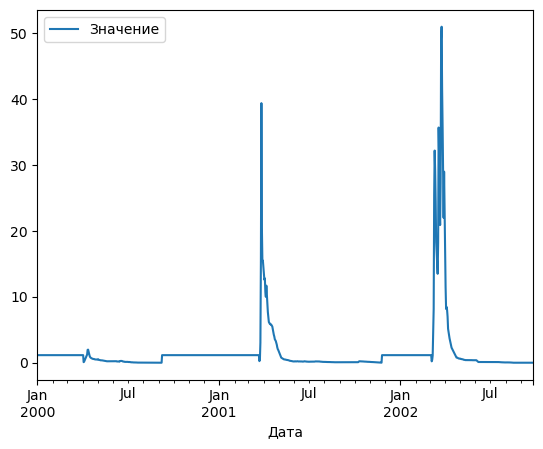

In [17]:
df.plot(kind='line', x='Дата', y='Значение')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Код поста  1000 non-null   int64         
 1   Дата       1000 non-null   datetime64[ns]
 2   Значение   1000 non-null   float64       
 3   Год        1000 non-null   int64         
 4   Месяц      1000 non-null   int64         
 5   День       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 47.0 KB


# Обучаем модель линейной регрессии:

In [19]:
# Выделяем характеристики (год) и целевую переменную (значение) из рамки данных:
X = df['Год'].values.reshape(-1, 1)
y = df['Значение'].values

In [20]:
# Разделяем данные на обучающие и тестовые наборы, используя train_test_split из sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Импортируем модель линейной регрессии из sklearn.linear_model и обучаем модель:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions and Calculate Statistics:

In [22]:
# Делаем прогнозы на тестовом наборе, используя обученную модель:
y_pred = model.predict(X_test)

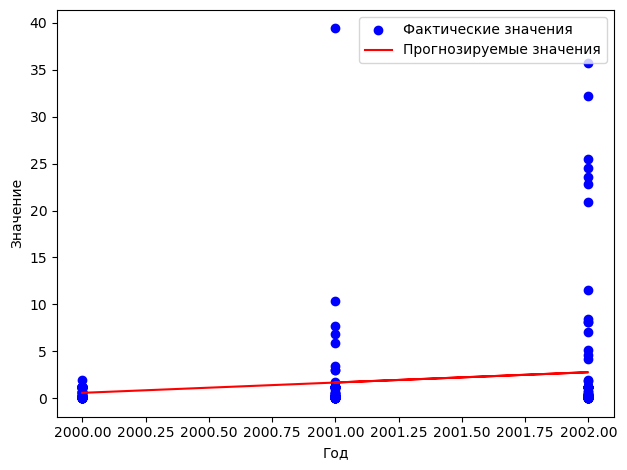

In [23]:
# Создаем точечную диаграмму фактических значений и прогнозируемых значений:
plt.scatter(X_test, y_test, color='blue', label='Фактические значения')
plt.plot(X_test, y_pred, color='red', label='Прогнозируемые значения')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.tight_layout()
plt.show()

Чтобы оценить точность модели линейной регрессии и сравнить фактические значения с прогнозируемыми, вы можете использовать различные регрессионные показатели. Вот пример с использованием показателей среднеквадратичной ошибки (MSE) и коэффициента детерминации (R-квадрат):

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error (MSE): 21.548978961411436
Coefficient of Determination (R-squared): 0.04021239455047021


Среднеквадратичная ошибка (MSE) измеряет среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями. Более низкий MSE указывает на лучшее соответствие модели данным.

Коэффициент детерминации (R-квадрат) представляет собой долю дисперсии целевой переменной, которая может быть объяснена с помощью модели линейной регрессии. Оно колеблется от 0 до 1, где 1 означает идеальную посадку. Более высокие значения R-квадрата указывают на лучшее соответствие модели данным.

Распечатав эти показатели, вы сможете оценить точность и производительность вашей модели линейной регрессии.

In [25]:
# Рассчитаем статистические данные, такие как среднее, максимальное и минимальное значения за 1 год:
year_stats = df.groupby('Год')['Значение'].agg(['mean', 'max', 'min'])

In [26]:
year_stats

,mean,max,min
Год,,,
2000,0.761246,1.99,0.001
2001,1.349049,39.40,0.005
2002,3.075565,51.00,0.002


In [27]:
year_stats.describe()

,mean,max,min
count,3.000000,3.000000,3.000000
mean,1.728620,30.796667,0.002667
std,1.202944,25.612654,0.002082
min,0.761246,1.990000,0.001000
25%,1.055148,20.695000,0.001500
50%,1.349049,39.400000,0.002000
75%,2.212307,45.200000,0.003500
max,3.075565,51.000000,0.005000
